In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [14]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYYt5_9pZTmCpkrfiemx9gwRCOZCfT9uOk-w&s"
req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
resp = urllib.request.urlopen(req)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img_color = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

In [15]:
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * (255 / (max_val - min_val))
    stretched = stretched.astype(np.uint8)
    return stretched

contrast_stretched_img = contrast_stretching(img)

In [16]:
hist_eq_img = cv2.equalizeHist(img)

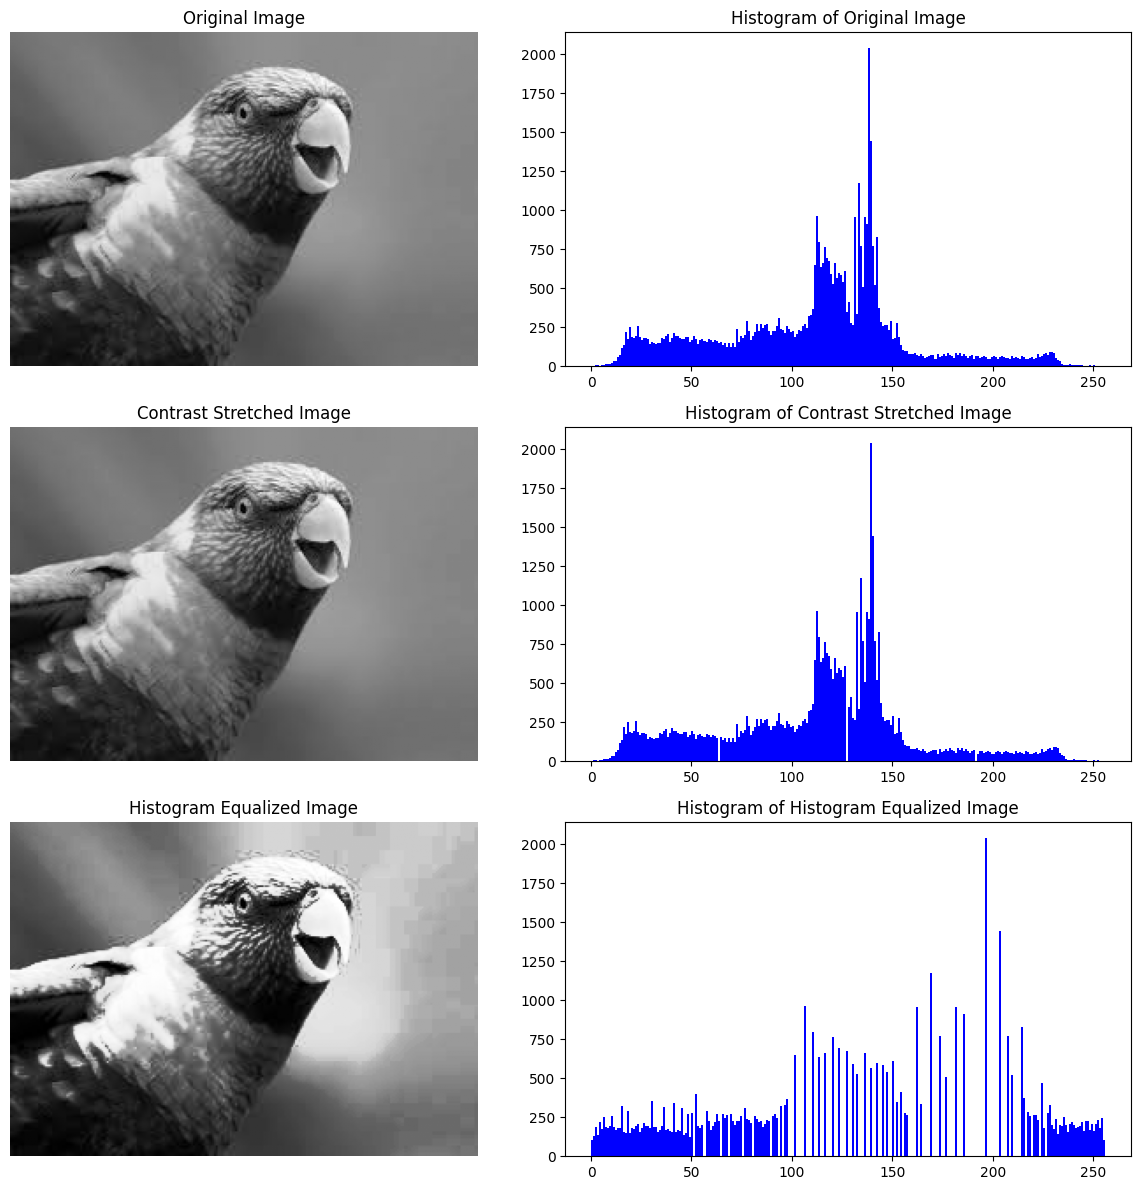

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')
axs[0, 1].hist(img.ravel(), bins=256, range=[0, 256], color='blue')
axs[0, 1].set_title('Histogram of Original Image')

axs[1, 0].imshow(contrast_stretched_img, cmap='gray')
axs[1, 0].set_title('Contrast Stretched Image')
axs[1, 0].axis('off')
axs[1, 1].hist(contrast_stretched_img.ravel(), bins=256, range=[0, 256], color='blue')
axs[1, 1].set_title('Histogram of Contrast Stretched Image')

axs[2, 0].imshow(hist_eq_img, cmap='gray')
axs[2, 0].set_title('Histogram Equalized Image')
axs[2, 0].axis('off')
axs[2, 1].hist(hist_eq_img.ravel(), bins=256, range=[0, 256], color='blue')
axs[2, 1].set_title('Histogram of Histogram Equalized Image')

plt.tight_layout()
plt.show()